<a href="https://colab.research.google.com/github/DangKhoa8422/END_TERM/blob/main/%C4%90%E1%BB%99_tu%E1%BB%95i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lấy data theo lable

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Độ tuổi/train/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('1'):
    output = 0
  if file.startswith('2'):
    output = 1
  if file.startswith('3'):
    output = 2
  if file.startswith('4'):
    output = 3
  if file.startswith('5'):
    output = 4
  if file.startswith('6'):
    output = 5
  img =load_img(folder+file,target_size=(40,30))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('Age_photos_train.npy',photos)
save('Age_labels_train.npy',labels)

(360, 40, 30, 3) (360,)


In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Độ tuổi/test/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('1'):
    output = 0
  if file.startswith('2'):
    output = 1
  if file.startswith('3'):
    output = 2
  if file.startswith('4'):
    output = 3
  if file.startswith('5'):
    output = 4
  if file.startswith('6'):
    output = 5
  img =load_img(folder+file,target_size=(40,30))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('Age_photos_test.npy',photos)
save('Age_labels_test.npy',labels)

(90, 40, 30, 3) (90,)


In [ ]:
import numpy as np
x_train = np.load('/content/Age_photos_train.npy')
y_train = np.load('/content/Age_labels_train.npy')
x_test = np.load('/content/Age_photos_test.npy')
y_test = np.load('/content/Age_labels_test.npy')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
     

(360, 40, 30, 3)
(360,)
(90, 40, 30, 3)
(90,)


#Chuẩn hóa dữ liệu

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)

#Train

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
from keras import regularizers

model = Sequential()
model.add(Conv2D(32,kernel_size = (5,5),activation = 'relu',input_shape=(40,30,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))


model.add(Conv2D(32,(5,5),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))


model.add(Conv2D(32,(5,5),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(320,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(160,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 30, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 15, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 8, 32)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 8, 32)         0

In [ ]:
train = model.fit(x_train, y_train, batch_size = 36, epochs = 80, verbose = 1)
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',round(test_loss))
print('Độ chính xác:',round(test_acc*100),'%')

Epoch 1/80
10/10 [==============================] - 2s 126ms/step - loss: 1.8181 - accuracy: 0.1611
Epoch 2/80
10/10 [==============================] - 1s 124ms/step - loss: 1.7867 - accuracy: 0.1833
Epoch 3/80
10/10 [==============================] - 1s 123ms/step - loss: 1.7896 - accuracy: 0.1972
Epoch 4/80
10/10 [==============================] - 2s 177ms/step - loss: 1.7852 - accuracy: 0.2056
Epoch 5/80
10/10 [==============================] - 2s 222ms/step - loss: 1.7712 - accuracy: 0.2333
Epoch 6/80
10/10 [==============================] - 2s 171ms/step - loss: 1.7465 - accuracy: 0.2750
Epoch 7/80
10/10 [==============================] - 1s 121ms/step - loss: 1.6331 - accuracy: 0.3444
Epoch 8/80
10/10 [==============================] - 1s 120ms/step - loss: 1.5913 - accuracy: 0.3611
Epoch 9/80
10/10 [==============================] - 1s 122ms/step - loss: 1.5508 - accuracy: 0.3889
Epoch 10/80
10/10 [==============================] - 1s 124ms/step - loss: 1.5049 - accuracy: 0.4028

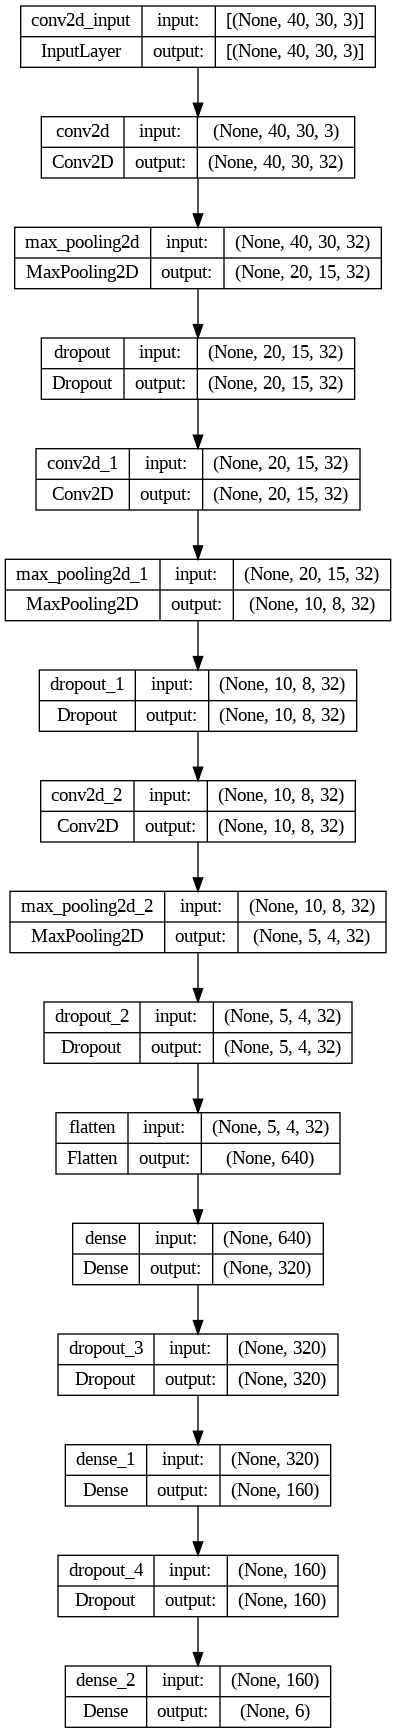

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


#Test

1/1 [==============================] - 0s 118ms/step
11-15


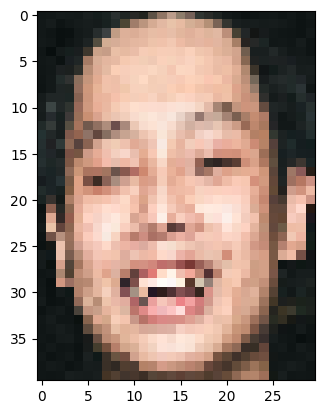

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {0: '1-5',1:'6-10', 2:'11-15', 3:'16-20', 4:'21-25', 5:'26-30' }
img = load_img("/content/1.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result = np.argmax(model.predict(img),axis=1)
print(vat[result[0]])
     

1/1 [==============================] - 0s 20ms/step
1-5


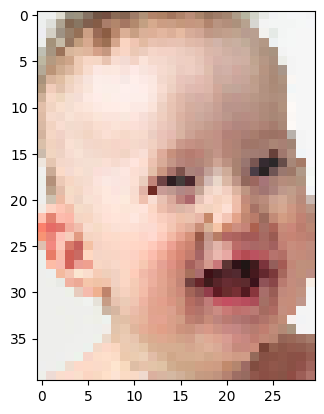

In [ ]:
img = load_img("/content/3.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result = np.argmax(model.predict(img),axis=1)
print(vat[result[0]])

1/1 [==============================] - 0s 203ms/step
11-15


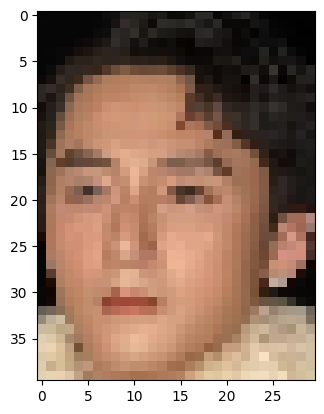

In [ ]:
img = load_img("/content/5.jpg",target_size=(40,30))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,40,30,3)
img = img.astype('float32')
img =img/255
result = np.argmax(model.predict(img),axis=1)
print(vat[result[0]])

In [ ]:
model.save('/content/drive/MyDrive/AGE.h5')

In [ ]:
model.save('/content/AGE.h5')